# Sentiment Analysis between Cancer Survivors & Caregivers and building recommendation system:

## Importing basic libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Importing advanced libraries

In [3]:
import plotly.graph_objects as go
import plotly.express as px

# Importing dataset

In [75]:
df = pd.read_csv("C:/Users/Admin/Documents/Projects - Sundaram/Domain based projects/01 HealthCare Domain/Mental Health Dataset.csv")

In [5]:
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB


# Null values treatment

In [7]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [8]:
def null_percent(a):
    return (a.isnull().sum()/len(a))*100

In [9]:
null_percent(df)

posts        0.009623
predicted    0.000000
intensity    0.000000
dtype: float64

Since the feature - posts has only textual data, we can drop the null values in that column

In [10]:
df[df.posts.isnull()]

,posts,predicted,intensity
3979,NaN,neutral,0


In [11]:
df = df.dropna()

In [12]:
null_percent(df)

posts        0.0
predicted    0.0
intensity    0.0
dtype: float64

In [13]:
df[df.posts.isnull()]

,posts,predicted,intensity


In [14]:
df.describe(include='all')

,posts,predicted,intensity
count,10391,10391,10391.000000
unique,10391,4,NaN
top,I know as parent of child with down syndrome t...,neutral,NaN
freq,1,4374,NaN
mean,NaN,NaN,-0.545857
std,NaN,NaN,0.783977
min,NaN,NaN,-2.000000
25%,NaN,NaN,-1.000000
50%,NaN,NaN,-1.000000
75%,NaN,NaN,0.000000


# EDA

In [15]:
df.nunique()

posts        10391
predicted        4
intensity        4
dtype: int64

In [16]:
df.posts.unique()

array(['I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some m

In [17]:
df.predicted.unique()

array(['negative', 'neutral', 'positive', 'very negative'], dtype=object)

In [18]:
df.intensity.unique()

array([-1,  0,  1, -2], dtype=int64)

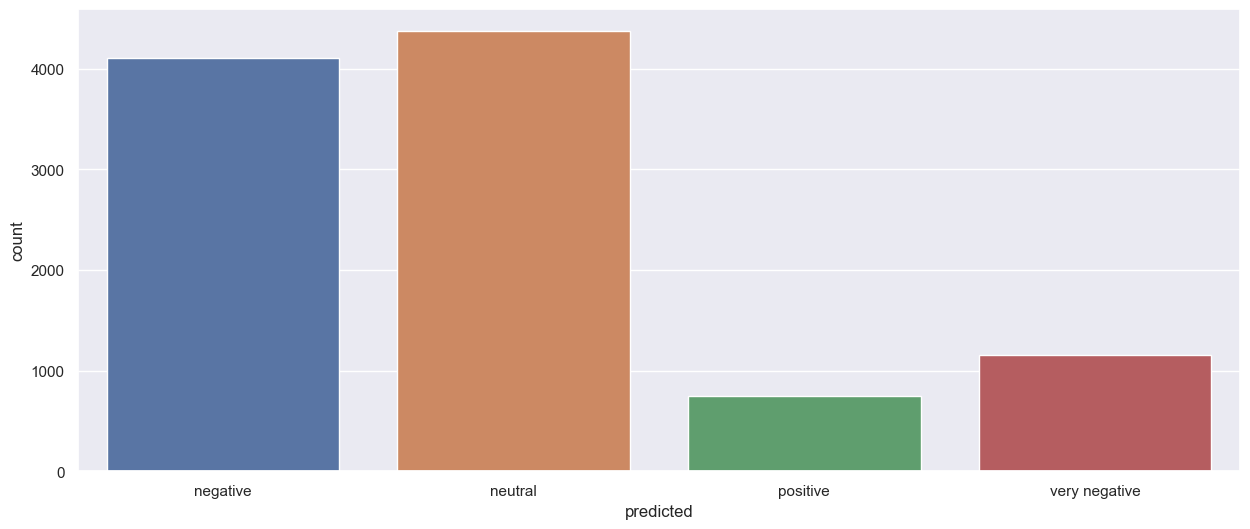

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = df['predicted'])
plt.show()

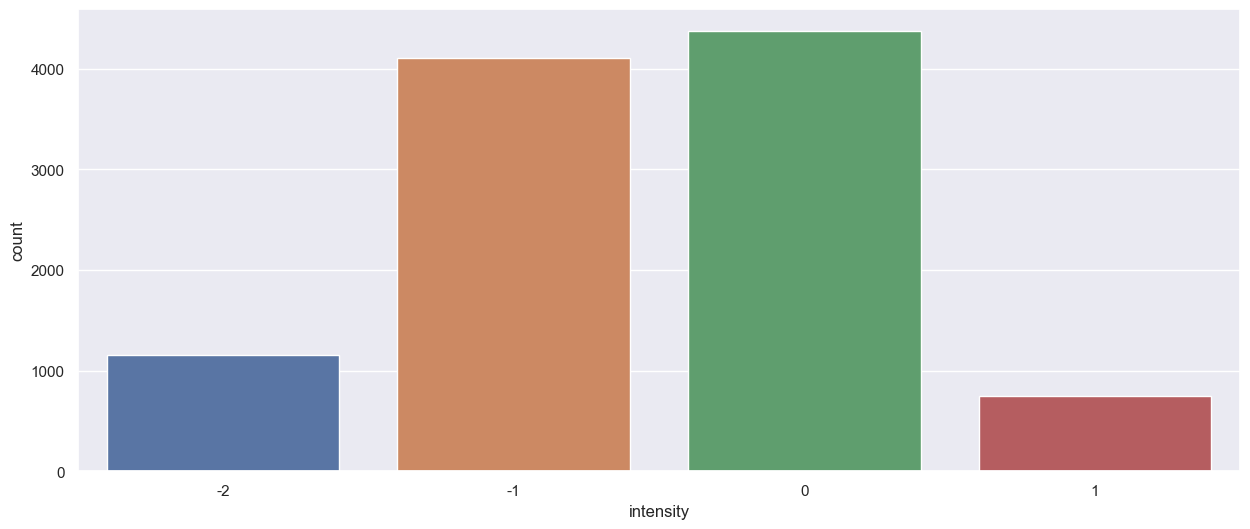

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = df['intensity'])
plt.show()

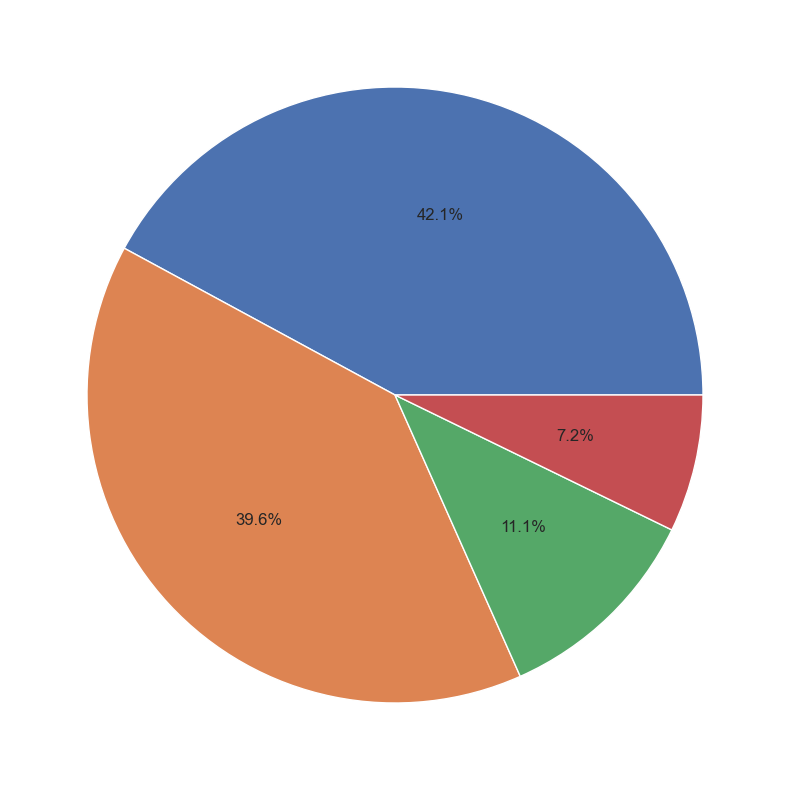

In [21]:
plt.figure(figsize=(15,10))
plt.pie(df['predicted'].value_counts(), autopct='%0.1f%%')
plt.show()

# Cleaning Text

In [22]:
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [44]:
df1 = df.copy()

In [45]:
df1['posts'].head()

0    I know as parent of child with down syndrome t...
1    but in my heart I know this is the future prom...
2    I have mylefibrosis which turn to leukemia the...
3    from one of my health group subject wayne dyer...
4    gmos now link to leukemia http nsnbc I 2013 07...
Name: posts, dtype: object

In [28]:
df1['posts'][0].lower()

'i know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but i quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then i have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and i tell my boss that he was sick and not to be surpise if i call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by t

In [46]:
df1.shape[0]

10391

## Text Lowering

In [47]:
def text_lower(a):
    lower_text = a.lower()
    return lower_text.strip()

In [48]:
df1['posts'] = df1['posts'].apply(lambda x: text_lower(x))

In [62]:
review1_0 = df1['posts'].values[0]
print(review1_0)

print("****************"*5)

review1_100 = df1['posts'].values[100]
print(review1_100)

print("****************"*5)

review1_5500 = df1['posts'].values[5500]
print(review1_5500)

print("****************"*5)

review1_10000 = df1['posts'].values[10000]
print(review1_10000)

i know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but i quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then i have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and i tell my boss that he was sick and not to be surpise if i call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by th

## Removal of Special Characters

In [63]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
def punctuation_remover(a):
    No_spl = ''.join([i for i in a if i not in string.punctuation])
    return No_spl

In [65]:
df1['posts'] = df1['posts'].apply(lambda x: punctuation_remover(x))

## Removal of Stopwords

In [66]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

AttributeError: module 'inspect' has no attribute 'formatargspec'

In [70]:
import nltk
from nltk.corpus import stopwords

AttributeError: module 'inspect' has no attribute 'formatargspec'

In [71]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

AttributeError: module 'inspect' has no attribute 'formatargspec'

In [69]:
import nltk
from wordcloud import WordCloud

AttributeError: module 'inspect' has no attribute 'formatargspec'

In [72]:

from wordcloud import WordCloud

AttributeError: module 'inspect' has no attribute 'formatargspec'

In [74]:
import nltk

AttributeError: module 'inspect' has no attribute 'formatargspec'

In [73]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

NameError: name 'nltk' is not defined